In [1]:
#影音文本分类
import tensorflow as tf
from tensorflow import keras
import numpy as np

/Users/zhangjianfeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_labels)

25000

In [4]:
len(train_labels)

25000

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_data[0]),len(train_data[1])

(218, 189)

In [7]:
word_index = imdb.get_word_index()

In [8]:
#将整数转换成字词
word_index = {k:(v+3) for k,v in word_index.items()}

In [9]:
word_index['fawn']

34704

In [10]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [11]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [12]:
#之所以+3,是为了把上面的几个字符加进去

In [13]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [14]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [15]:
type(word_index),type(reverse_word_index)

(dict, dict)

In [16]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [17]:
decode_review("jianfeng")

'? ? ? ? ? ? ? ?'

In [18]:
decode_review([1,14])

'<START> this'

In [19]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [20]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [21]:
#将影评长度标准化

In [22]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding='post',maxlen=256)

In [23]:
train_data

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

In [24]:
len(train_data[0])

256

In [25]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [26]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [27]:
test_data

array([[   1,  591,  202, ...,    0,    0,    0],
       [   6,  176,    7, ...,  125,    4, 3077],
       [  57, 4893,    5, ...,    9,   57,  975],
       ...,
       [   1,   13, 1408, ...,    0,    0,    0],
       [   1,   11,  119, ...,    0,    0,    0],
       [   1,    6,   52, ...,    0,    0,    0]], dtype=int32)

In [28]:
vocab_size = 10000
model = keras.Sequential()

In [29]:
#词向量为10000个

In [30]:
model

In [31]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [32]:
model.add(keras.layers.Embedding(vocab_size,16))

In [33]:
model.add(keras.layers.GlobalAveragePooling1D())

In [34]:
# https://blog.csdn.net/u014061630/article/details/81086564
# 这边文章介绍的不错

In [35]:
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 按顺序堆叠各个层以构建分类器：
# 第一层是 Embedding 层。该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量。
# 模型在接受训练时会学习这些向量。这些向量会向输出数组添加一个维度。生成的维度为：(batch, sequence, embedding)。

# 接下来，一个 GlobalAveragePooling1D 层通过对序列维度求平均值，针对每个样本返回一个长度固定的输出向量。
# 这样，模型便能够以尽可能简单的方式处理各种长度的输入。
# 该长度固定的输出向量会传入一个全连接 (Dense) 层（包含 16 个隐藏单元）。
# 最后一层与单个输出节点密集连接。应用 sigmoid 激活函数后，结果是介于 0 到 1 之间的浮点值，表示概率或置信水平。

In [38]:
#coding=utf-8
'''
tf.keras.Model.compile 有三个重要的参数：
optimizer：训练过程使用的优化方法。此参数通过 tf.train 模块的优化方法的实例来指定，比如：AdamOptimizer，RMSPropOptimizer，GradientDescentOptimizer。
loss：训练过程中使用的损失函数（通过最小化损失函数来训练模型）。
常用的有：(mse，categorical_crossentropy 和 binary_crossentropy)。
指定方法：名称 或 tf.keras.losses 模块中的函数。
metrics：训练过程中，监测的指标（Used to monitor training）。
指定方法：名称 或 tf.keras.metrics 模块中的函数。
'''

'\ntf.keras.Model.compile 有三个重要的参数：\noptimizer：训练过程使用的优化方法。此参数通过 tf.train 模块的优化方法的实例来指定，比如：AdamOptimizer，RMSPropOptimizer，GradientDescentOptimizer。\nloss：训练过程中使用的损失函数（通过最小化损失函数来训练模型）。\n常用的有：(mse，categorical_crossentropy 和 binary_crossentropy)。\n指定方法：名称 或 tf.keras.losses 模块中的函数。\nmetrics：训练过程中，监测的指标（Used to monitor training）。\n指定方法：名称 或 tf.keras.metrics 模块中的函数。\n'

In [39]:
"""
自适应矩估计，如果一个随机变量 X 服从某个分布，X 的一阶矩是 E(X)，也就是样本平均值，X 的二阶矩就是 E(X^2)，
也就是样本平方的平均值。Adam 算法根据损失函数对每个参数的梯度的一阶矩估计和二阶矩估计动态调整针对于每个参数的学习速率。
TensorFlow提供的tf.train.AdamOptimizer可控制学习速度。Adam 也是基于梯度下降的方法，
但是每次迭代参数的学习步长都有一个确定的范围，不会因为很大的梯度导致很大的学习步长，参数的值比较稳定
"""

'\n自适应矩估计，如果一个随机变量 X 服从某个分布，X 的一阶矩是 E(X)，也就是样本平均值，X 的二阶矩就是 E(X^2)，\n也就是样本平方的平均值。Adam 算法根据损失函数对每个参数的梯度的一阶矩估计和二阶矩估计动态调整针对于每个参数的学习速率。\nTensorFlow提供的tf.train.AdamOptimizer可控制学习速度。Adam 也是基于梯度下降的方法，\n但是每次迭代参数的学习步长都有一个确定的范围，不会因为很大的梯度导致很大的学习步长，参数的值比较稳定\n'

In [40]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
"""
1，用sigmoid作为激活函数，为什么往往损失函数选用binary_crossentropy 
参考地址:https://blog.csdn.net/wtq1993/article/details/51741471

2,softmax与categorical_crossentropy的关系，以及sigmoid与bianry_crossentropy的关系。 
参考地址:https://www.zhihu.com/question/36307214

3,各大损失函数的定义:MSE,MAE,MAPE,hinge,squad_hinge,binary_crossentropy等 
参考地址:https://www.cnblogs.com/laurdawn/p/5841192.html

4、彻底搞懂逻辑斯蒂回归
https://blog.csdn.net/sinat_29957455/article/details/78944939
"""

'\n1，用sigmoid作为激活函数，为什么往往损失函数选用binary_crossentropy\xa0\n参考地址:https://blog.csdn.net/wtq1993/article/details/51741471\n\n2,softmax与categorical_crossentropy的关系，以及sigmoid与bianry_crossentropy的关系。\xa0\n参考地址:https://www.zhihu.com/question/36307214\n\n3,各大损失函数的定义:MSE,MAE,MAPE,hinge,squad_hinge,binary_crossentropy等\xa0\n参考地址:https://www.cnblogs.com/laurdawn/p/5841192.html\n\n4、彻底搞懂逻辑斯蒂回归\nhttps://blog.csdn.net/sinat_29957455/article/details/78944939\n'

In [42]:
len(train_data[:10000])

10000

In [43]:
len(train_data)

25000

In [44]:
"""
在训练时，我们需要检查模型处理从未见过的数据的准确率。我们从原始训练数据中分离出 10000 个样本，创建一个验证集。
（为什么现在不使用测试集？我们的目标是仅使用训练数据开发和调整模型，然后仅使用一次测试数据评估准确率。）
这就是为什么要分测试集和开发集的原因
"""

'\n在训练时，我们需要检查模型处理从未见过的数据的准确率。我们从原始训练数据中分离出 10000 个样本，创建一个验证集。\n（为什么现在不使用测试集？我们的目标是仅使用训练数据开发和调整模型，然后仅使用一次测试数据评估准确率。）\n这就是为什么要分测试集和开发集的原因\n'

In [45]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

In [46]:
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 34us/step - loss: 0.6920 - acc: 0.5115 - val_loss: 0.6903 - val_acc: 0.5394
Epoch 2/40
15000/15000 [==============================] - 0s 14us/step - loss: 0.6862 - acc: 0.6132 - val_loss: 0.6820 - val_acc: 0.7020
Epoch 3/40
15000/15000 [==============================] - 0s 14us/step - loss: 0.6728 - acc: 0.7073 - val_loss: 0.6651 - val_acc: 0.7241
Epoch 4/40
15000/15000 [==============================] - 0s 15us/step - loss: 0.6484 - acc: 0.7605 - val_loss: 0.6380 - val_acc: 0.7446
Epoch 5/40
15000/15000 [==============================] - 0s 15us/step - loss: 0.6128 - acc: 0.7853 - val_loss: 0.6005 - val_acc: 0.7839
Epoch 6/40
15000/15000 [==============================] - 0s 16us/step - loss: 0.5688 - acc: 0.8115 - val_loss: 0.5582 - val_acc: 0.8086
Epoch 7/40
15000/15000 [==============================] - 0s 14us/step - loss: 0.5205 - acc: 0.8359 - val_loss: 0.5145 - val_acc

In [48]:
results = model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 0s 13us/step


In [49]:
results

[0.3309207667827606, 0.87204]

In [50]:
#上面返回的是误差和准确率

In [51]:
history_dict = history.history

In [52]:
history_dict

{'val_loss': [0.6902785640716552,
  0.682028521347046,
  0.6650879416465759,
  0.6380034296989441,
  0.60052268409729,
  0.5582248538970948,
  0.5145209938049317,
  0.47325831303596494,
  0.4373021161079407,
  0.40758111386299134,
  0.38554592108726504,
  0.3636121367931366,
  0.3486138864994049,
  0.33512804985046385,
  0.3248565355300903,
  0.31638843312263487,
  0.30951940994262694,
  0.30372923369407656,
  0.29902530641555786,
  0.2952288375854492,
  0.2922635887145996,
  0.2900960144996643,
  0.28899645290374754,
  0.286958363199234,
  0.2859922863483429,
  0.2861224971294403,
  0.28633753547668456,
  0.28622948637008666,
  0.28653536343574526,
  0.2875626308441162,
  0.2891154986858368,
  0.2908673258304596,
  0.2926678520679474,
  0.2946953117847443,
  0.29638371868133545,
  0.29916567516326903,
  0.3017967697143555,
  0.3048178513526916,
  0.30746124663352964,
  0.31030466146469116],
 'val_acc': [0.5394000001907349,
  0.702,
  0.7240999992370606,
  0.7445999996185303,
  0.78389

In [53]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [54]:
history_dict['acc']

[0.5114666663805644,
 0.6131999998092651,
 0.7073333336194356,
 0.760466666507721,
 0.7852666665077209,
 0.8115333333015442,
 0.8358666668256124,
 0.8520666663805644,
 0.8638666668256124,
 0.876799999777476,
 0.8854,
 0.8902666668256124,
 0.8982000001907349,
 0.903933333269755,
 0.9087999999364217,
 0.9127999998728434,
 0.9183333332061767,
 0.9227333333651225,
 0.9261333333969116,
 0.9288000001271566,
 0.9324666664123535,
 0.9373333331425985,
 0.9409999997138977,
 0.9450000000635783,
 0.94766666653951,
 0.9494666668891907,
 0.952800000222524,
 0.9556666668891907,
 0.9561999998092652,
 0.959133333047231,
 0.9618000000635782,
 0.9634666666348776,
 0.9661999998092652,
 0.9673999997138977,
 0.968733333237966,
 0.971133333047231,
 0.9721333333015442,
 0.9725999999046325,
 0.9748666667302449,
 0.9765333333015442]

In [55]:
len(history_dict['acc'])

40

In [56]:
import matplotlib.pyplot as plt


In [57]:
acc = history.history['acc']

In [58]:
val_acc = history.history['val_acc']

In [59]:
val_acc

[0.5394000001907349,
 0.702,
 0.7240999992370606,
 0.7445999996185303,
 0.7838999992370606,
 0.8086000007629395,
 0.8242999996185303,
 0.8368000002861022,
 0.8462000006675721,
 0.853800000667572,
 0.8589000004768371,
 0.8661999994277955,
 0.8692999996185303,
 0.8739999998092651,
 0.8766,
 0.8776000001907348,
 0.8782,
 0.8811000002861022,
 0.8820000002861023,
 0.8828000002861023,
 0.8830000003814698,
 0.8842000002861023,
 0.8836000002861023,
 0.8848000002861023,
 0.8857000003814697,
 0.8861000002861023,
 0.8862000002861022,
 0.8869000001907349,
 0.8863,
 0.8863000001907348,
 0.8865,
 0.8855999999046326,
 0.8862999999046326,
 0.8853000000953675,
 0.8859999999046325,
 0.8851,
 0.8846999999046326,
 0.8838,
 0.8834999998092652,
 0.8834999998092652]

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [61]:
epochs = range(1,len(acc)+1)

In [62]:
epochs

range(1, 41)

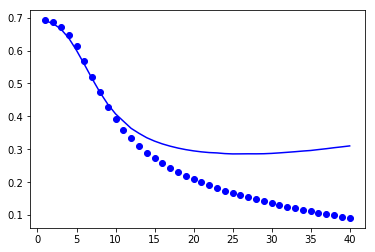

In [63]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

No handles with labels found to put in legend.


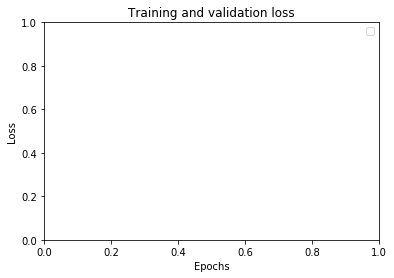

In [64]:
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

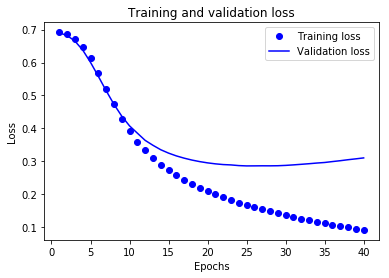

In [67]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

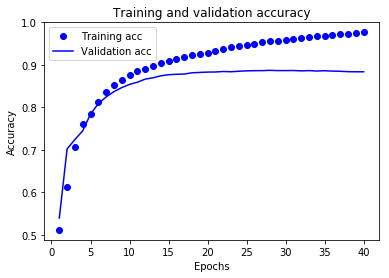

In [68]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()